#### **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_insurance = pd.read_csv('insurance.csv')
df_insurance.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

## **Cleaning Data**

In [3]:
# we will work on the copy just in case something happens to the data while coding
df = df_insurance.copy()
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Categorical to Numerical
In order to predict futur charges for the new entries, we need to convert the categorical variables into numerical variables since charges is 'int'. 

Let's convert 'sex', 'smoker'and 'region'.

In [6]:
# find categories for each variable
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [7]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [8]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [9]:
df['sex'].replace(['female','male'], [0,1], inplace = True)
df['smoker'].replace(['no','yes'], [0,1], inplace = True)
df['region'].replace(['southeast','southwest','northeast','northwest'], [1,2,3,4], inplace = True)
df.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       2  16884.92400
1   18    1  33.770         1       0       1   1725.55230
2   28    1  33.000         3       0       1   4449.46200
3   33    1  22.705         0       0       4  21984.47061
4   32    1  28.880         0       0       4   3866.85520

In [10]:
# check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


## **Visualization**

In [11]:
# Correlation between variables
df.corr()

age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.005212  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185 -0.016121  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750 -0.261829  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.019257  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.053930  0.787251
region    0.005212 -0.016121 -0.261829  0.019257 -0.053930  1.000000 -0.056993
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.056993  1.000000

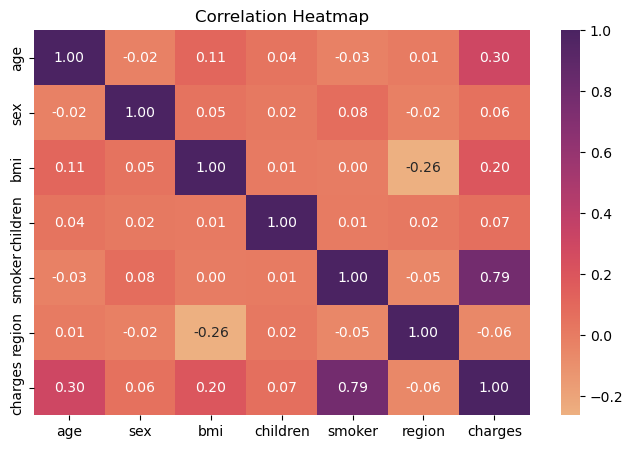

In [12]:
# Correlation Heatmap
mat_corr = df.corr()

plt.figure(figsize=(8,5))
sns.heatmap(mat_corr, cmap='flare', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

We notice that there's a strong correlation between smoking and the cost of inssurance.

In [13]:
df_insurance.select_dtypes(include=['object']).describe()

sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364

In [14]:
# average of charges per sex
tabs = df_insurance.groupby('sex')['charges'].mean()

# Convert to DataFrame
tabs = tabs.reset_index()
tabs

sex       charges
0  female  12569.578844
1    male  13956.751178

In [15]:
tabm = df_insurance.groupby('smoker')['charges'].mean()
tabm = tabm.reset_index()
tabm

smoker       charges
0     no   8434.268298
1    yes  32050.231832

In [16]:
tabr = df_insurance.groupby('region')['charges'].mean()
tabr = tabr.reset_index()
tabr

region       charges
0  northeast  13406.384516
1  northwest  12417.575374
2  southeast  14735.411438
3  southwest  12346.937377

Which region got insured more?

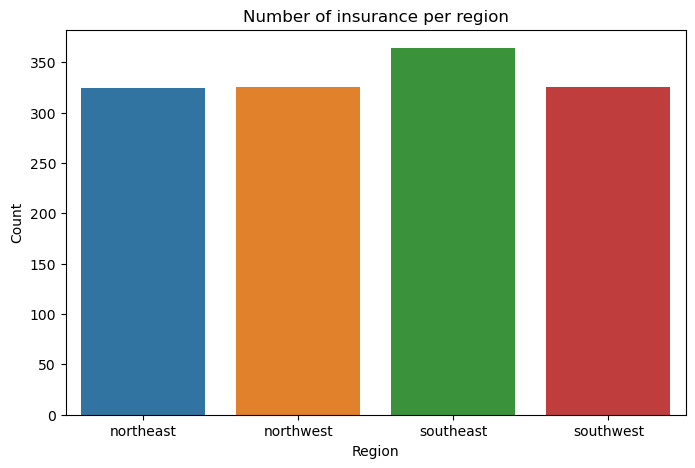

In [17]:
northeast = len(df_insurance[df_insurance['region']=='northeast'])
northwest = len(df_insurance[df_insurance['region']=='northwest'])
southeast = len(df_insurance[df_insurance['region']=='southeast'])
southwest = len(df_insurance[df_insurance['region']=='southwest'])

plt.figure(figsize=(8,5))
sns.barplot(x=['northeast','northwest','southeast','southwest'],
           y= [northeast,northwest,southeast,southwest]) 
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of insurance per region')
plt.show()

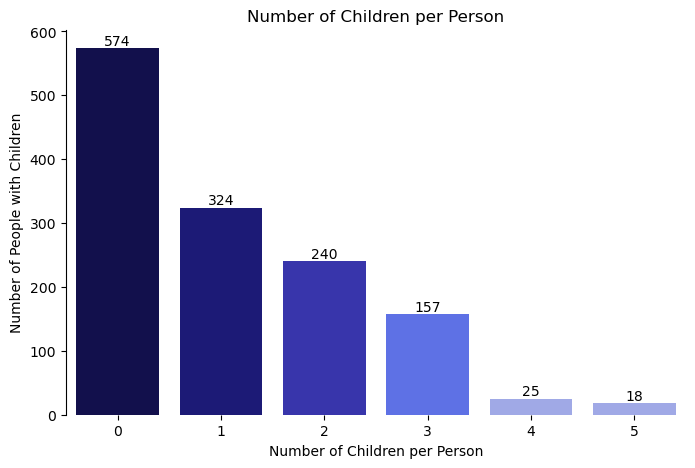

In [18]:
col = ['#080656','#0e0b85','#2521bf', '#4861fb', '#94a1f2', '#94a1f2']
fig, ax =  plt.subplots(figsize=(8,5))
ax = sns.countplot(x=df_insurance['children'], palette=col)
plt.xlabel('Number of Children per Person')
plt.ylabel('Number of People with Children')
plt.title('Number of Children per Person')

for i in ax.containers:
    ax.bar_label(i)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()       

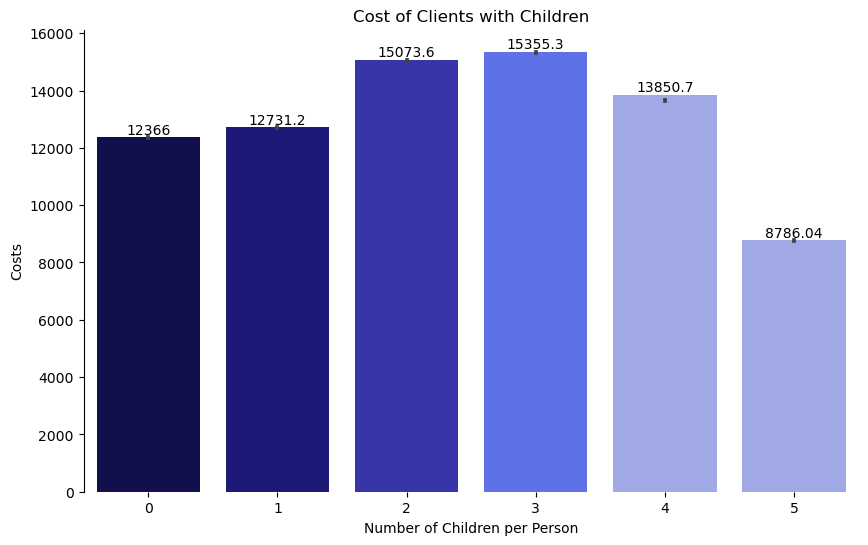

In [19]:
fig, ax =  plt.subplots(figsize=(10,6))
ax = sns.barplot(x=df_insurance['children'], 
                 y =df_insurance['charges'],
                 errorbar=('ci', 1),
                 palette=col)
plt.xlabel('Number of Children per Person')
plt.ylabel('Costs')
plt.title('Cost of Clients with Children')

for i in ax.containers:
    ax.bar_label(i)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()  

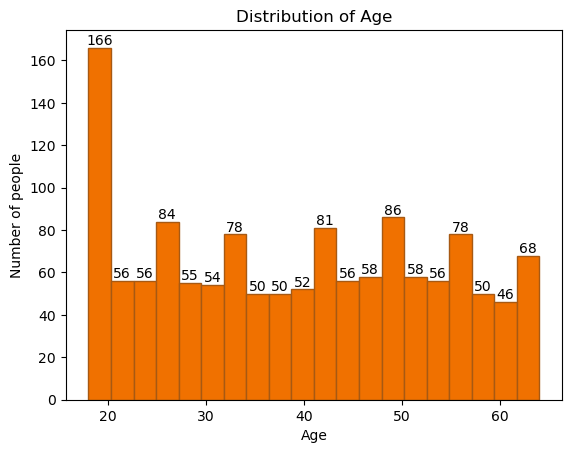

In [20]:
fig, ax = plt.subplots()
ax.hist(df['age'], bins=20, color='#f07100', edgecolor='#a75913')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of people')

for i in ax.containers:
    ax.bar_label(i)
plt.show()

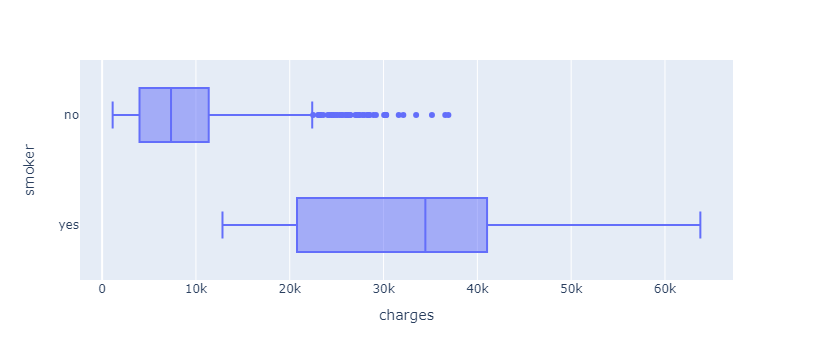

In [21]:
import plotly.express as px

fig=px.box(df_insurance, y='smoker', x='charges')
              
fig.show()

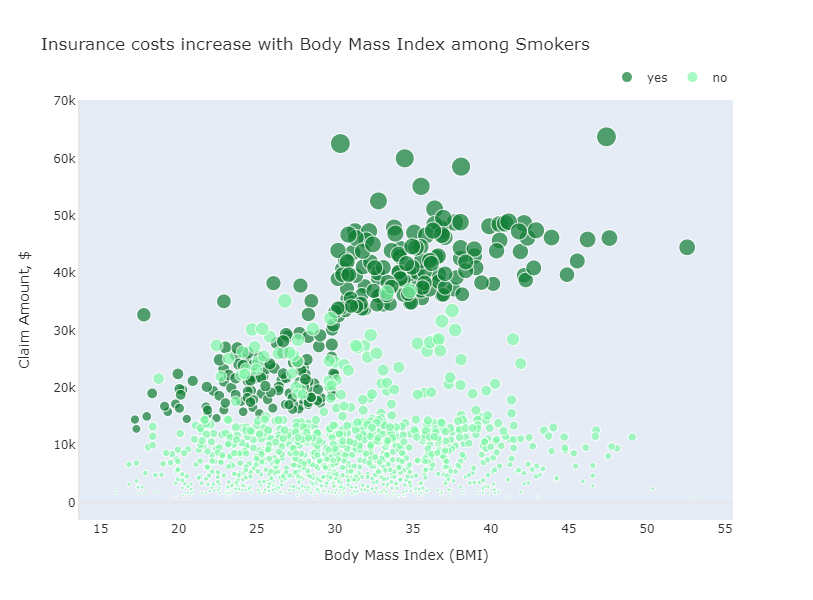

In [22]:
fig = px.scatter(df_insurance, x='bmi', y='charges', color='smoker', size='charges',
                 title="Insurance costs increase with Body Mass Index among Smokers",
                 color_discrete_sequence=['#107d34','#80f7a8'],height=600)

fig.update_layout(legend=dict(title='',orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  font_color="#303030", 
                  xaxis=dict(title='Body Mass Index (BMI)',showgrid=False), 
                  yaxis=dict(title='Claim Amount, $',showgrid=False, zerolinecolor='#E5E5EA',
                             showline=True, linecolor='#E5E5EA', linewidth=2))
fig.show()

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



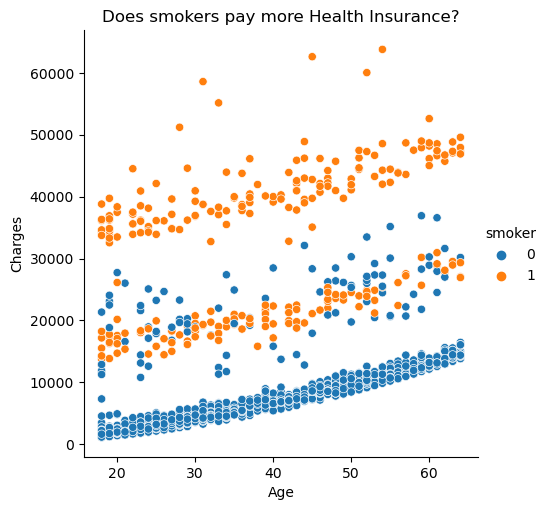

In [23]:
sns.relplot(x='age', y='charges',data=df, hue= 'smoker')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Does smokers pay more Health Insurance?')  
plt.show()

##  **Regression with Machine Learning**

In [24]:
# libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, RidgeCV
from sklearn.preprocessing import StandardScaler

In [25]:
features = df.columns[0:6]
target = df.columns[-1]

X = df[features].values
y = df[target].values

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))


The dimension of X_train is (1070, 6)
The dimension of X_test is (268, 6)


In [26]:
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear and Ridge Regression Models
We will build a linear and a ridge regression model and then compare the coefficients in a plot. The score of the train and test sets will also help us evaluate how well the model performs.

In [27]:
### Linear Model
# Model
lr = LinearRegression()

# Fit model
lr.fit(X_train, y_train)

# Prediction
prediction = lr.predict(X_test)

# compare score
train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

### Ridge Regression
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train, y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

The train score for lr model is 0.7515544337131946
The test score for lr model is 0.7333390756537821

Ridge Model............................................

The train score for ridge model is 0.7514899311447284
The test score for ridge model is 0.7347583211911886


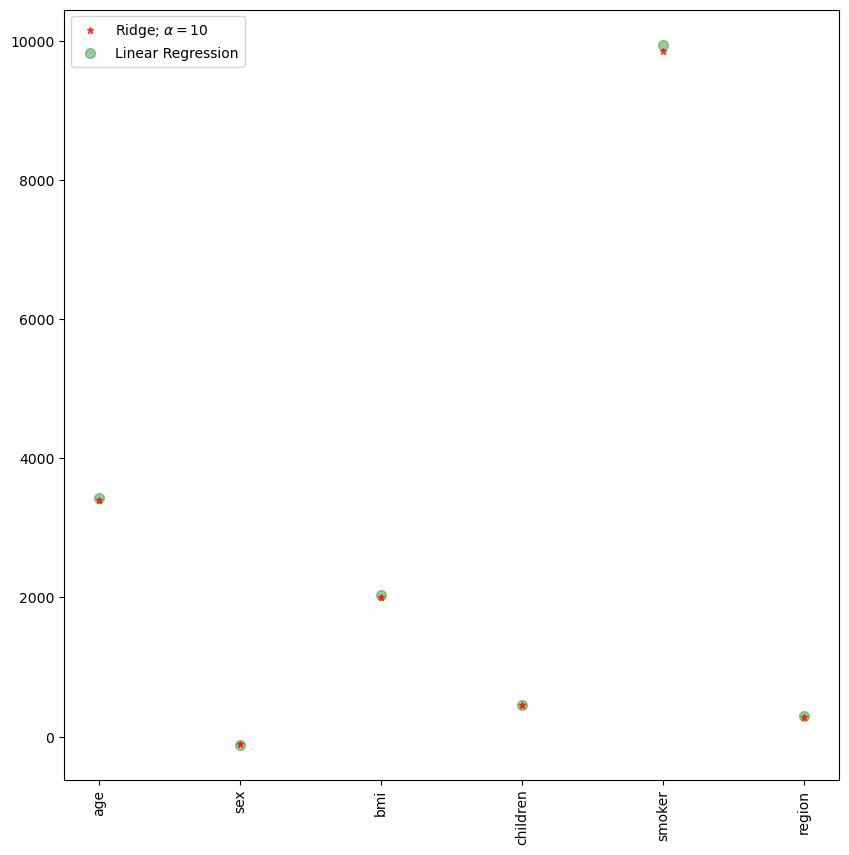

In [28]:
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
#plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()


In [29]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1 , 10]).fit(X_train, y_train)

#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))

0.7515501938793018
0.733292623538224


In [30]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The test score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))

The train score for ridge model is 0.7515537775219919
The test score for ridge model is 0.7334894606191815


### K Neighbors Regressor

In [31]:
from sklearn.neighbors._regression import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(X_train, y_train)

#score
print("The train score for K Neighbors Regressor model is {}".format(knr.score(X_train, y_train)))
print("The test score for K Neighbors Regressor model is {}".format(knr.score(X_test, y_test)))

The train score for K Neighbors Regressor model is 0.8768695402882128
The test score for K Neighbors Regressor model is 0.7923141862310219


### Random Forest Regressor

In [32]:
from sklearn.ensemble._forest import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

# score
print("The train score for Random Forest Regressor is {}".format(rf.score(X_train, y_train)))
print("The test score for Random Forest Regressor is {}".format(rf.score(X_test, y_test)))

The train score for Random Forest Regressor is 0.9766197750832324
The test score for Random Forest Regressor is 0.8425812301255623


### Extreme Gradient Boosting

In [33]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [34]:
from xgboost import XGBRegressor

In [35]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

# score
print("The train score for Extreme Gradient Boosting Regressor is {}".format(xgbr.score(X_train, y_train)))
print("The test score for Extreme Gradient Boosting Regressor is {}".format(xgbr.score(X_test, y_test)))

The train score for Extreme Gradient Boosting Regressor is 0.9951680297189597
The test score for Extreme Gradient Boosting Regressor is 0.7997711644616567


From all the test score results the Random Forest Regressor appears to be the best model with the highest coefficient of determination but to confirm the results we should have used cross validation method.

New Prediction

In [36]:
new_data =pd.DataFrame({
    'age': [19],
    'sex': [0],
    'bmi': [27.9],
    'children': [0],
    'smoker': [1],
    'region': [2]
})


predictions = xgbr.predict(new_data.values)
 
# Print the predictions
print('Predicted charges for the new data: {:.2f}'.format(predictions[0])) 

Predicted charges for the new data: 20850.52
